# Integrate with SnapATAC

Combine clusters and other metadata from previous SnapATAC runs into ArchR.

In [2]:
library(ArchR)
library(patchwork)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [3]:
set.seed(1)
addArchRThreads(threads = 32) 

Setting default number of Parallel threads to 32.



In [4]:
addArchRGenome("hg38")

Setting default genome to Hg38.



In [5]:
ArrowFiles = c('D0.arrow',
               'D2.arrow',
               'D4.arrow',
               'D6.arrow',
               'D8.arrow',
               'D10.arrow',
               'D12.arrow',
               'D14.arrow')
#              'H1.arrow')

In [6]:
proj <- ArchRProject(
  ArrowFiles = paste("/srv/scratch/surag/scATAC-reprog/arrow/", ArrowFiles, sep=''), 
  outputDirectory = "/srv/scratch/surag/scATAC-reprog/arrow/without_iPSC_snapATAC_integrate",
  copyArrows = FALSE #This is recommened so that you maintain an unaltered copy for later usage.
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,-

In [7]:
metadata = read.table("../20200122_snapATAC/snapATAC_sessions/20200125_n76770/metadata.tsv", header=T)
metadata = metadata[metadata$cluster != 5, ]
rownames(metadata) = paste(metadata$sample, metadata$barcode, sep='#')
metadata = metadata[rownames(metadata) %in% proj$cellNames, ]
head(metadata)
dim(metadata)

,barcode,cluster,umap1,umap2,barcode.1,TN,UM,PP,UQ,CM,landmark,cluster.1,sample
,<fct>,<int>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
D0#AAACACGCTTAACGAA,AAACACGCTTAACGAA,18,1.94019471,5.856366,AAACACGCTTAACGAA,1561,1441,1433,1253,5,1,18,D0
D0#AAACCGTACTAATAGG,AAACCGTACTAATAGG,1,1.97615737,8.665288,AAACCGTACTAATAGG,54681,49118,49000,43136,97,1,1,D0
D0#AAACGACCTTTGGGAG,AAACGACCTTTGGGAG,1,2.06346449,6.915973,AAACGACCTTTGGGAG,12898,11642,11617,10208,4,1,1,D0
D0#AAACTCTCTCATTCAG,AAACTCTCTCATTCAG,1,0.95524428,7.580315,AAACTCTCTCATTCAG,25683,22897,22850,19949,4,1,1,D0
D0#AAAGACTGAACCTTGA,AAAGACTGAACCTTGA,1,-0.01277339,6.033615,AAAGACTGAACCTTGA,23253,20927,20893,17495,95,1,1,D0
D0#AAAGCATGACGAGTGA,AAAGCATGACGAGTGA,6,2.66941147,7.258521,AAAGCATGACGAGTGA,26354,23970,23903,21411,31,1,6,D0


[1] 72796    13

In [8]:
# if there's no Cluster 5 ArchR makes Cluster 6 Cluster 5 and so on
# so swap the last cluster (18) and make it 5
metadata[metadata$cluster==18, "cluster"] = 5

In [9]:
# subset to files with metadata
proj = proj[rownames(metadata), ]

In [10]:
proj <- addIterativeLSI(ArchRProj = proj, iterations = 2, force=T, useMatrix = "TileMatrix", name = "IterativeLSI")

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-4f5fc3a657e-Date-2020-04-28_Time-01-00-32.log
If there is an issue, please report to github with logFile!

2020-04-28 01:00:32 : Computing Total Accessibility Across All Features, 0.005 mins elapsed.

2020-04-28 01:00:46 : Computing Top Features, 0.232 mins elapsed.

###########
2020-04-28 01:00:47 : Running LSI (1 of 2) on Top Features, 0.245 mins elapsed.
###########

2020-04-28 01:00:47 : Sampling Cells (N = 10003) for Estimated LSI, 0.249 mins elapsed.

2020-04-28 01:00:47 : Creating Sampled Partial Matrix, 0.249 mins elapsed.

2020-04-28 01:01:13 : Computing Estimated LSI (projectAll = FALSE), 0.683 mins elapsed.

2020-04-28 01:06:53 : Identifying Clusters, 6.355 mins elapsed.

2020-04-28 01:08:13 : Identified 3 Clusters, 7.69 mins elapsed.

2020-04-28 01:08:13 : Saving LSI Iteration, 7.69 mins elapsed.

ggrastr is not available for rastr of points, continuing without rastr!

To install ggrastr try : devtools::

In [11]:
# using clusters from SnapATAC
proj$Clusters = paste("C", metadata$cluster, sep='')

In [12]:
proj <- addUMAP(ArchRProj = proj, reducedDims = "IterativeLSI", force=T)

01:12:55 UMAP embedding parameters a = 0.7669 b = 1.223

01:12:55 Read 72796 rows and found 30 numeric columns

01:12:55 Using Annoy for neighbor search, n_neighbors = 40

01:12:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

01:13:20 Writing NN index file to temp file /tmp/Rtmp2DsElJ/file4f5f13ed5ebf

01:13:20 Searching Annoy index using 28 threads, search_k = 4000

01:13:24 Annoy recall = 100%

01:13:25 Commencing smooth kNN distance calibration using 28 threads

01:13:34 Initializing from normalized Laplacian + noise

01:13:44 Commencing optimization for 200 epochs, with 4732262 positive edges

01:15:18 Optimization finished



In [13]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4f5f56046b7c-Date-2020-04-28_Time-01-15-27.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
ggrastr is not available for rastr of points, continuing without rastr!

To install ggrastr try : devtools::install_github('VPetukhov/ggrastr')



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4f5f56046b7c-Date-2020-04-28_Time-01-15-27.log



In [14]:
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4f5f663c1c72-Date-2020-04-28_Time-01-15-28.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
ggrastr is not available for rastr of points, continuing without rastr!

To install ggrastr try : devtools::install_github('VPetukhov/ggrastr')



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4f5f663c1c72-Date-2020-04-28_Time-01-15-28.log



Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `col

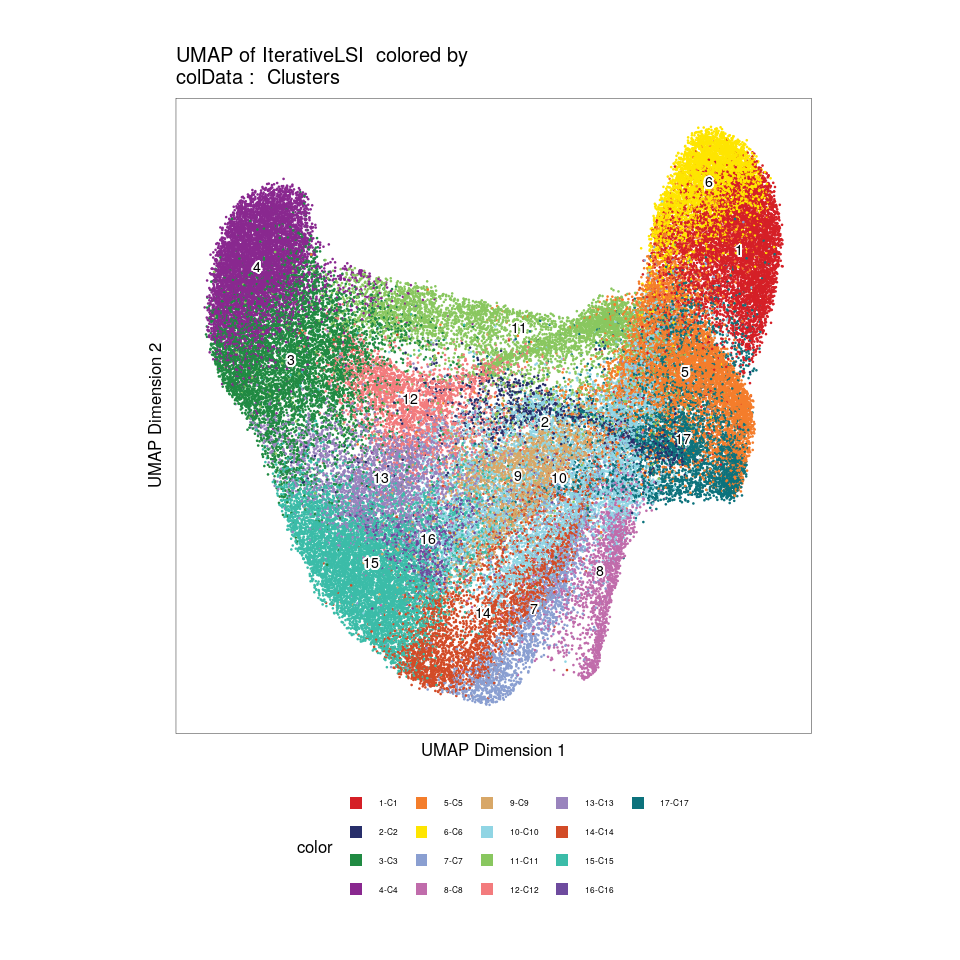

In [15]:
options(repr.plot.width = 8, repr.plot.height = 8)

p2

In [16]:
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-4f5f382e2d79-Date-2020-04-28_Time-01-15-35.log
If there is an issue, please report to github with logFile!

2020-04-28 01:15:35 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [17]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-4f5f42fbf419-Date-2020-04-28_Time-01-16-51.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-04-28 01:16:52 : Matching Known Biases, 0.004 mins elapsed.

###########
2020-04-28 01:18:45 : Completed Pairwise Tests, 1.889 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-4f5f42fbf419-Date-2020-04-28_Time-01-16-51.log



In [18]:
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.01 & Log2FC >= 1.25")

In [19]:
markerList$C7$name[!grepl("MIR", markerList$C7$name)]

[1] "MAP2"         "LRRC69"       "JAKMIP2"      "ZC3H13"       "EMC2"        
 [6] "SYTL5"        "NUTM2B"       "CENPW"        "LOC100506682" "LOC105369507"
[11] "KIF3A"        "SYNE1-AS1"    "LOC101928020" "MBNL3"        "NEGR1-IT1"   
[16] "PIK3R4"       "OPA1-AS1"     "SLC9A9-AS1"   "EDRF1-AS1"    "LOC105369509"
[21] "TMF1"         "FAM13A-AS1"   "TXNRD3NB"     "LCMT1-AS2"    "LOC105372069"
[26] "SCML2"        "CYBB"         "A4GNT"        "OR13J1"       "SNORD20"     
[31] "EVI2B"        "TTC21B-AS1"   "MLH1"         "GNRHR"        "CCDC168"     
[36] "NT5C1B"       "ARMCX5"       "PGAM4"        "EBLN2"        "RRH"         
[41] "SLC22A13"     "ARMH2"        "SNORA20"      "REP15"        "AMY2B"       
[46] "OR56B1"       "SEMG2"        "LOC100506142" "SNORA75"      "ACKR4"       
[51] "KRTAP3-2"     "GBP7"         "OR2D2"        "TAS2R3"       "LOC101928865"
[56] "TXNDC12-AS1"  "OR2D3"        "TAS2R7"       "SNORA15"      "OR5A2"       
[61] "SNORD113-8"   "HP"           "TAAR6"        "LINC01352"

In [20]:
grep("DOK6", markerList$C7$name)

integer(0)

In [21]:
geneAnnoHg38$genes[geneAnnoHg38$genes$symbol %in% c('MAP2'),]

GRanges object with 1 range and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr2 209424058-209734118      + |        4133        MAP2
  -------
  seqinfo: 24 sequences from hg38 genome

In [36]:
heatmapGS <- markerHeatmap(
  seMarker = markersGS, 
  cutOff = "FDR <= 0.01 & Log2FC >= 1.25", 
  labelMarkers = c(),
  transpose = TRUE
)

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-4f5f4b3195ba-Date-2020-04-28_Time-01-40-46.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

C1:

	NLRP10, MIR331, MIR134, MIR668, MIR485, MIR323B, MIR154, GREM1, OR4F15, MIR6883, KRTAP4-9, MIR133A1HG, MIR133A1, PSG11, CGB5, CASS4, GPR87, HTRA4, LOC101928748, SEMA4A

C2:

	SNORD114-6, MIR3689D1, MIR3689E, SNORD114-25, SNORD114-26, SNORD114-29, SNORD114-30, MIR200A, MIR429, MIR6726, MIR6808, MMP23A, LINC01346, AJAP1, MTOR-AS1, AADACL3, C1orf158, PRAMEF7, PRAMEF6, PRAMEF18

C3:

	PRAMEF7, PRAMEF6, PRAMEF18, PRAMEF5, PDPN, GJB5, LOC101929721, LINC01761, LOC102723661, LOC101928009, CD1E, OR10T2, OR10J3, OR10J1, OR10J5, LOC101928372, ANKRD45, TEX50, MIR488, BLACAT1

C4:

	MMP23A, LINC01346, AJAP1, C1orf158, CD52, LIN28A, C1orf94, TMEM125, HPDL, CYP4A11, CYP4X1, CYP4Z1, SLC5A9, AGBL4-IT1, ELAV

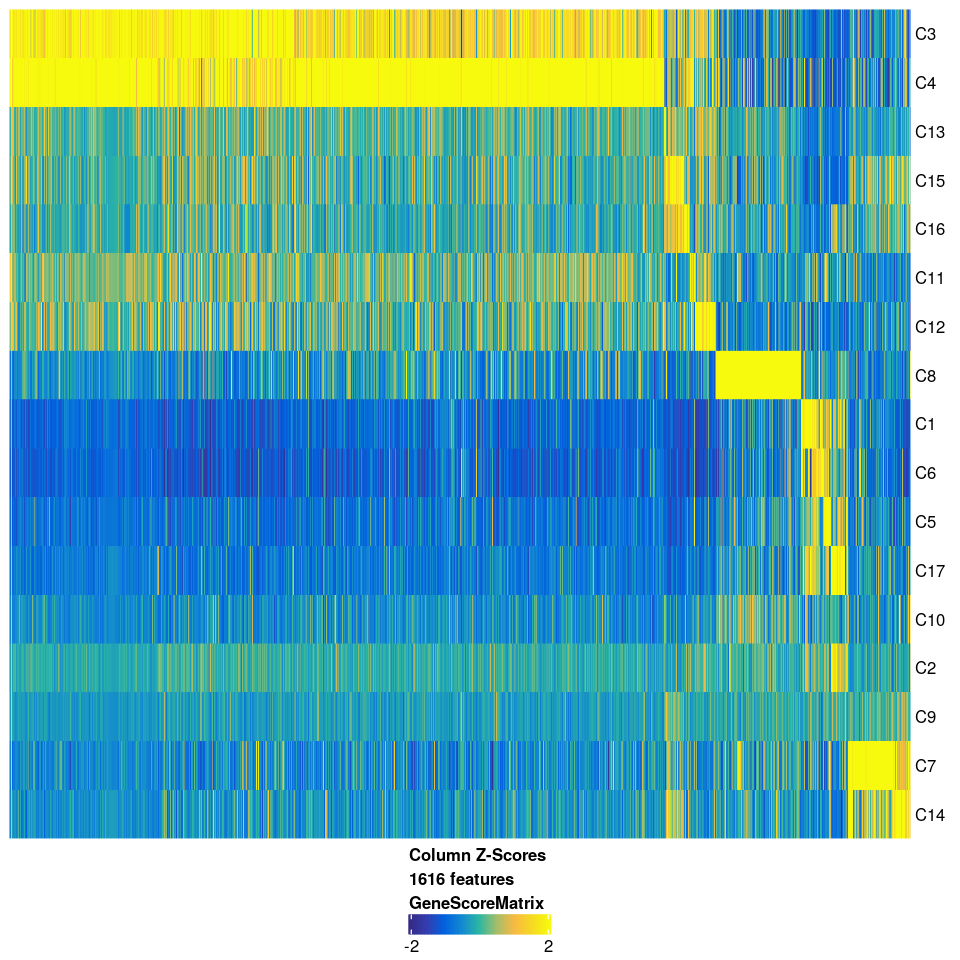

In [37]:
ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [38]:
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = c("SCEL"), 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4f5f688b6e90-Date-2020-04-28_Time-01-41-06.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-04-28 01:41:07 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4f5f688b6e90-Date-2020-04-28_Time-01-41-06.log



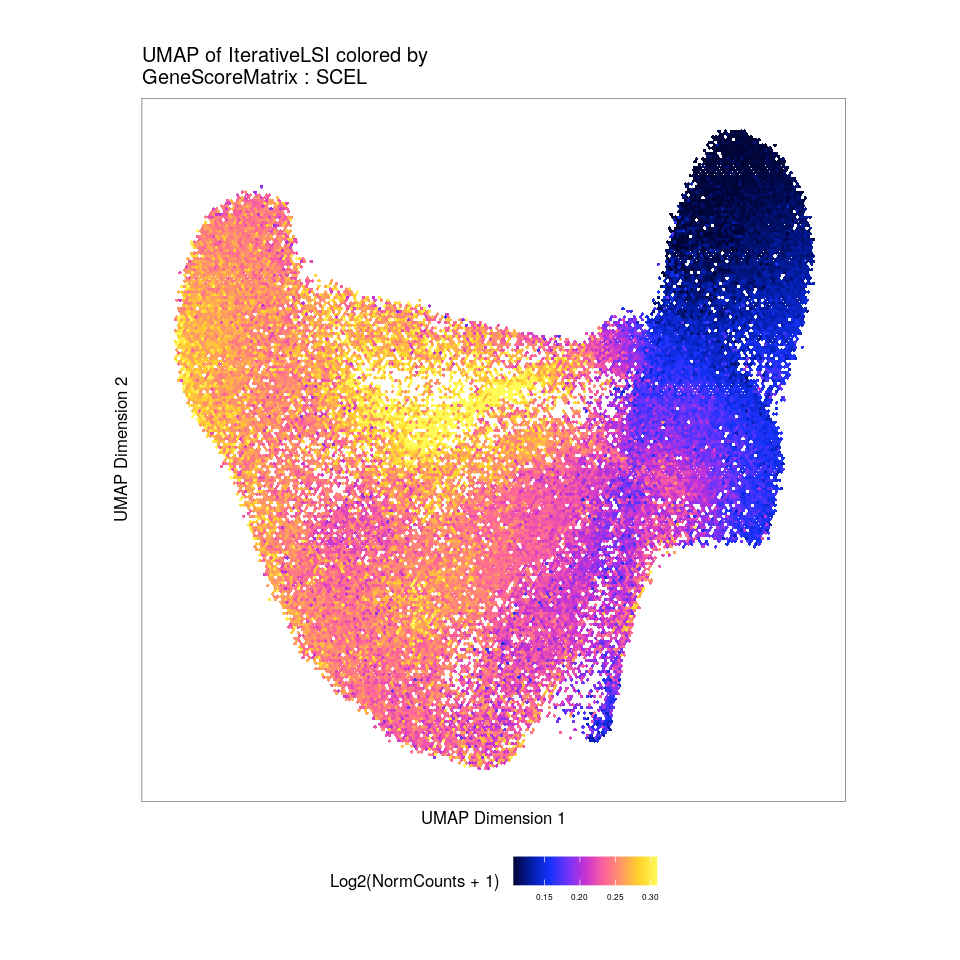

In [39]:
p

In [24]:
Q = "ODF1"
assay(markersGS, "Log2FC")[which(rowData(markersGS)$name==Q),]
assay(markersGS, "FDR")[which(rowData(markersGS)$name==Q),]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22691,0.1487581,-0.03110707,0.1350372,0.1365552,-0.07945772,0.1784474,-0.1621637,-0.4955477,0.09104713,-0.08809378,0.1207787,-0.1193855,-0.2333979,0.1444845,-0.07029598,-0.406429,-0.1090601


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22691,0.04179229,0.915112,0.6184989,0.488642,0.8991797,0.1253146,0.04617034,0.3080255,0.6001199,0.7711129,0.7124335,0.7325724,0.4409169,0.4389024,0.7132867,0.003365633,0.6608852


## Relation between pvalue, LFC and Gene Length

ArchR does a Wilcoxon (paired test) for each single cell in cluster matched with a background cell with similar bias. This may favour longer genes which would consistently have higher values than their background cells (assuming it is differential), versus smaller genes which may not get many reads and thus not be consistently higher than their background. 

In [25]:
df = data.frame(lfc=assay(markersGS, "Log2FC")$C1,
           fdr=assay(markersGS, "FDR")$C1)
rownames(df) = rowData(markersGS)$name

In [26]:
df = df[df$lfc>1,]
# df = df[df$fdr<0.1,]

In [27]:
head(df[rev(order(df$lfc)), ])

,lfc,fdr
,<dbl>,<dbl>
RAB41,2.636969,1.749040e-01
MIR331,2.479846,7.055412e-05
SNORD115-30,2.393972,6.024436e-02
MIR518A1,2.257437,1.000000e+00
MIR323B,2.113085,1.227953e-04
MIR668,2.097237,6.811261e-04


In [28]:
glengths = data.frame(len=width(geneAnnoHg38$genes))
glengths = glengths[!is.na(geneAnnoHg38$genes$symbol),]
names(glengths) = as.vector(geneAnnoHg38$genes$symbol[!is.na(geneAnnoHg38$genes$symbol)])

In [29]:
cor(log10(glengths[rownames(df)]), -log(df$fdr))

[1] 0.604279

Seems like FDR is correlated with gene length. Effectively, it would be correlated with effective length that includes the region the gene score includes.

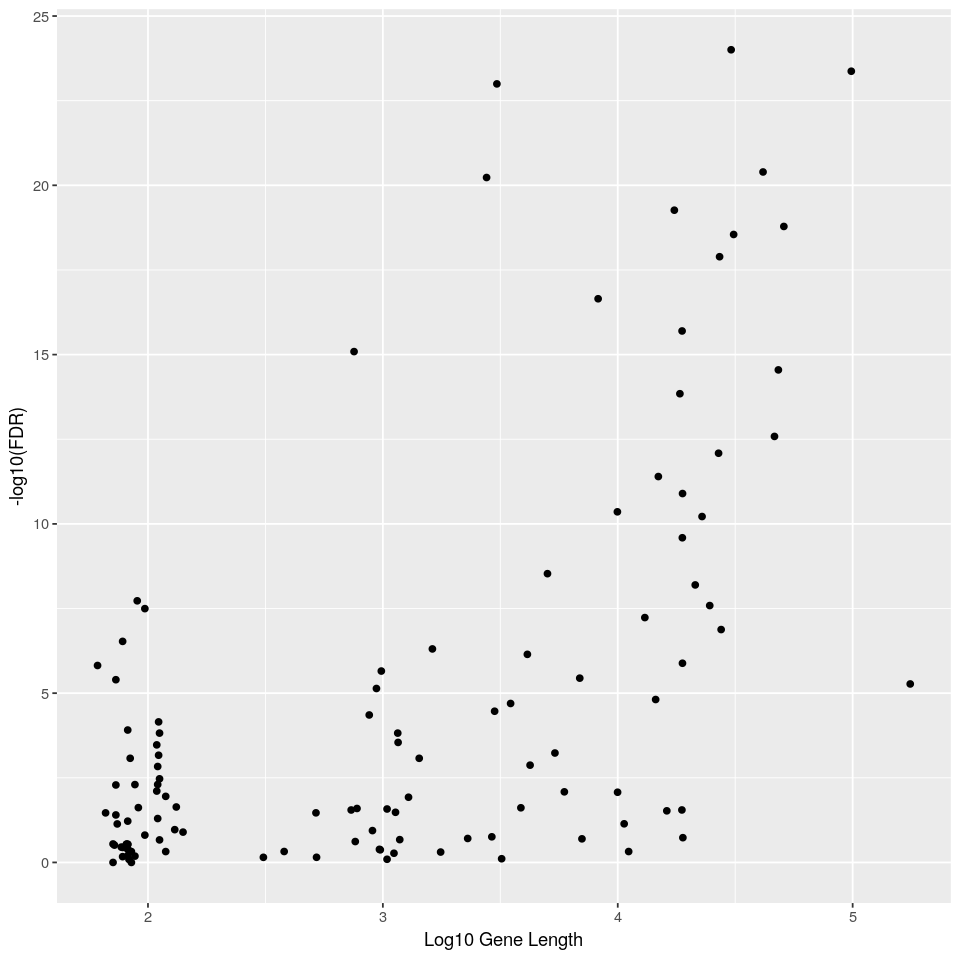

In [31]:
ggplot(data.frame(x=log10(glengths[rownames(df)]), y=-log10(df$fdr))) +
geom_point(aes(x=x,y=y)) +
xlab('Log10 Gene Length') + ylab('-log10(FDR)')

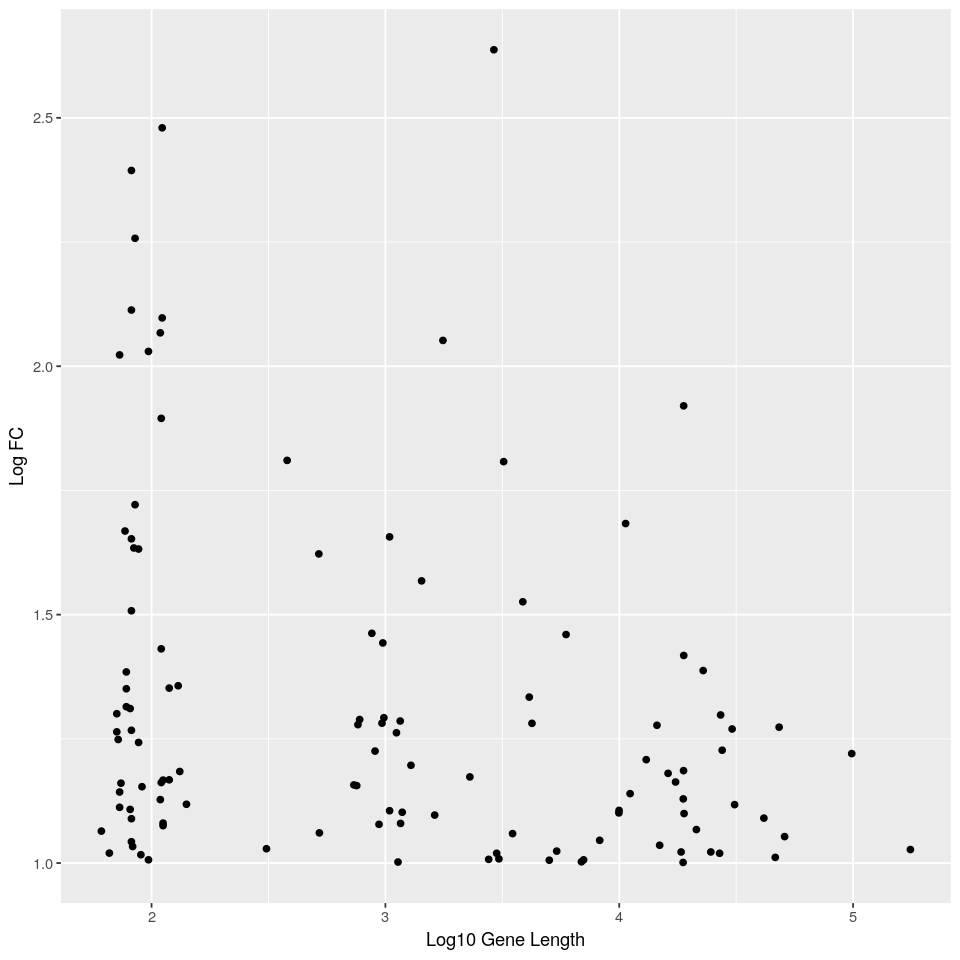

In [35]:
ggplot(data.frame(x=log10(glengths[rownames(df)]), y=df$lfc)) +
geom_point(aes(x=x,y=y)) +
xlab('Log10 Gene Length') + ylab('Log FC')

## mRNA analysis

From Cachiarelli et al 2015

In [48]:
# load bulk RNA-seq data
fpkm = read.table("/users/surag/kundajelab/scATAC-reprog/resources/GSE62777/RNAseq.FPKM.tsv", sep='\t', header=T)
fpkm$gene_id = NULL
fpkm$locus=NULL
tpm = fpkm
tpm[,2:ncol(tpm)] = 1e6*t(t(tpm[,2:ncol(tpm)])/colSums(tpm[,2:ncol(tpm)]))

# removing genes with dup names
tpm = tpm[!duplicated(tpm$gene_short_name),]
rownames(tpm) = tpm$gene_short_name
tpm$gene_short_name = NULL

tpm["GAPDH",]

,hiF.T_P14,X2dd_DOX_plus,X5dd_DOX_plus,X8dd_DOX_plus,X10dd_DOX_plus_SSEA3_pos,X14dd_DOX_plus_SSEA3_pos,X20dd_DOX_plus_TRA_plus,X24dd_TRA_pos_DOX_plus,X24dd_TRA_pos_DOX_minus,hIPSC.T_P10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,7803.64,4963.505,3908.693,3839.776,3795.548,3364.503,3032.412,3790.955,5598.224,4731.256


In [259]:
gene_set_to_plot = markerList$C7$name[1:10] #[1:200]
# gene_set_to_plot = names(rev(sort(table(e2g_uniq$g)[table(e2g_uniq$g)>2])))

In [260]:
colMedians(as.matrix(log2(1+tpm)[rownames(tpm) %in% gene_set_to_plot, ]))

[1] 1.053794 4.658309 5.461368 3.955181 2.826428 1.877645 1.182532 1.767750
 [9] 2.182310 2.679100

[1] 8

Warning message in melt(t(scale(t(log2(1 + tpm)[rownames(tpm) %in% gene_set_to_plot, :
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(scale(t(log2(1 + tpm)[rownames(tpm) %in% gene_set_to_plot,     ])))). In the next version, this warning will become an error.”
Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”


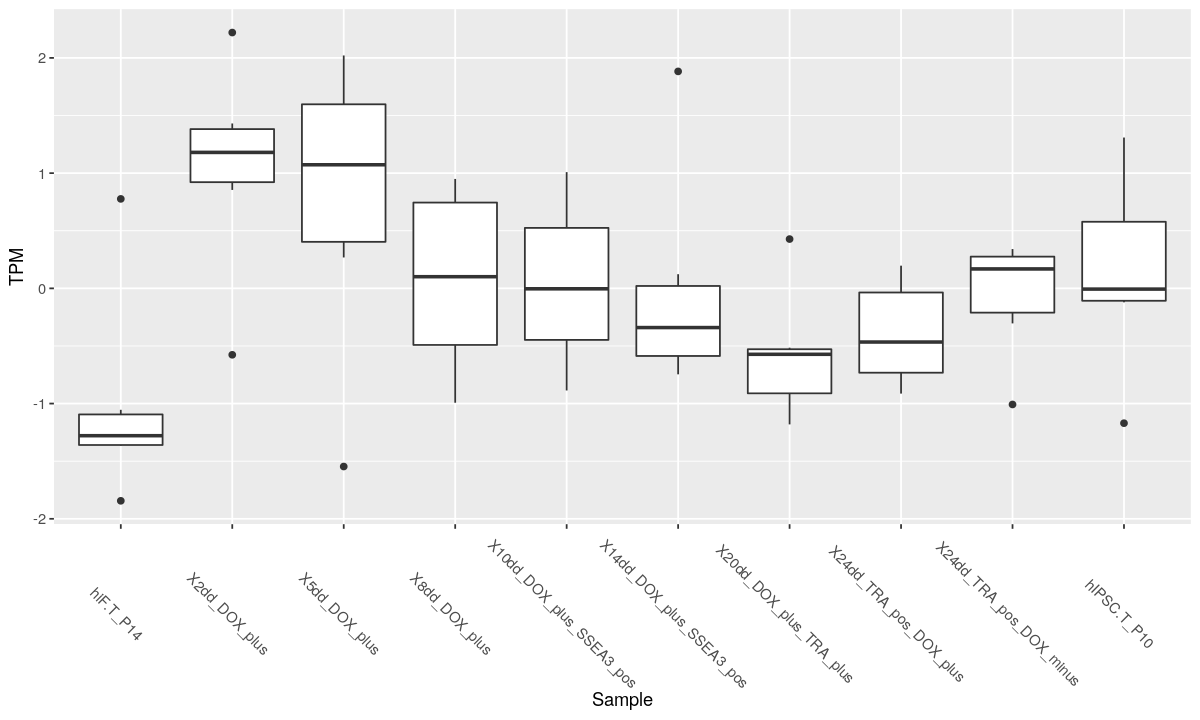

In [261]:
options(repr.plot.width = 10, repr.plot.height = 6)

sum(gene_set_to_plot %in% rownames(tpm))

# ggplot(melt(log2(1+tpm)[rownames(tpm) %in% gene_set_to_plot, ]), aes(x=variable, y=value)) +
ggplot(melt(t(scale(t(log2(1+tpm)[rownames(tpm) %in% gene_set_to_plot, ])))), aes(x=Var2, y=value)) +
stat_boxplot() +
# geom_line(aes(group=Var1),size=0.1) + geom_point() +
theme(axis.text.x = element_text(angle = -45)) +
ylab("TPM") + xlab("Sample")
# geom_boxplot(outlier.shape = NA) + geom_jitter(width = 0.2)
# coord_cartesian(ylim=c(0,8)) 

In [46]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gridExtra_2.3                     uwot_0.1.8                       
 [3] nabor_0.5.0                       Seurat_3.1.5                     
 [5] BSgenome.Hsapiens.UCSC.hg38_1.4.1 BSgenome_1.54.0                  
 [7] rtracklayer_1.46.0                Biost